In [1]:
from main import im_copy
!curl -L -o "04-files.zip" "https://drive.google.com/uc?id=18iSMK5cmBA5V8zc18-jIB2Vel6pnVHBI"
!unzip -o 04-files.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15.0M  100 15.0M    0     0  1863k      0  0:00:08  0:00:08 --:--:-- 3856k
Archive:  04-files.zip
   creating: 04-files/
  inflating: __MACOSX/._04-files     
  inflating: 04-files/cars.jpg       
  inflating: __MACOSX/04-files/._cars.jpg  
  inflating: 04-files/IMG_5781.JPG   
  inflating: __MACOSX/04-files/._IMG_5781.JPG  
  inflating: 04-files/IMG_5782.JPG   
  inflating: __MACOSX/04-files/._IMG_5782.JPG  
  inflating: 04-files/IMG_5783.JPG   
  inflating: __MACOSX/04-files/._IMG_5783.JPG  
  inflating: 04-files/.DS_Store      
  inflating: __MACOSX/04-files/._.DS_Store  
  inflating: 04-files/fusion-building.jpg  
  inflating: __MACOSX/04-files/._fusion-building.jpg  
  inflating: 04-files/cars2.jpg      
  inflating: __MACOSX/04-files/._cars2.j

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cv2.__version__

'4.11.0'

In [4]:
def show_img(im, ax=None, figsize=(8,8)):
    if not ax: _, ax = plt.subplots(1,1,figsize=figsize)
    if len(im.shape) == 2: im = np.tile(im[:, :, None], 3)
    ax.imshow(im[:, :, ::-1])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    return ax

## Harris Corner Detection

<Axes: >

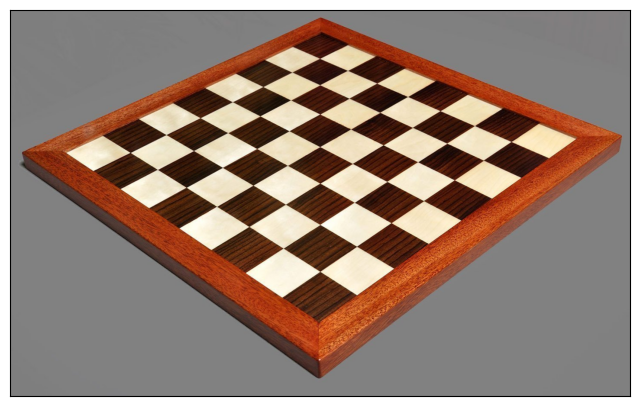

In [5]:
im = cv2.imread('04-files/chessboard.jpg')
show_img(im)

In [7]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype(np.float32)

In [8]:
??cv2.cornerHarris

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-64188590.0..142290160.0].


<Axes: >

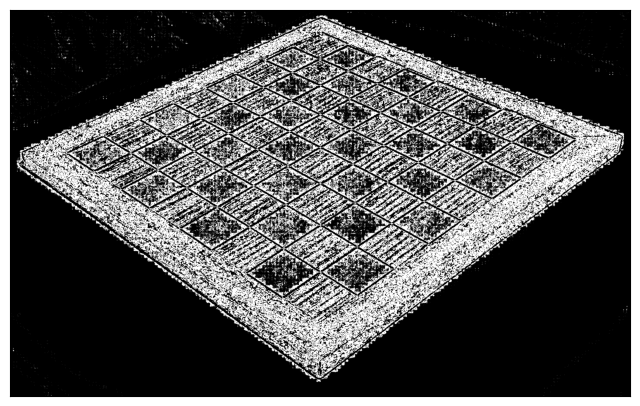

In [9]:
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
show_img(dst)

<Axes: >

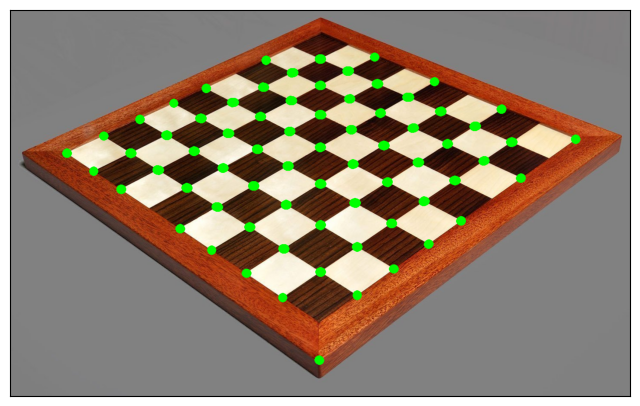

In [10]:
im_copy = im.copy()
for pt in np.argwhere(dst>0.05*dst.max()):
    im_copy = cv2.circle(im_copy, tuple(pt[::-1]), 5, (0,255,0), 10)
show_img(im_copy)

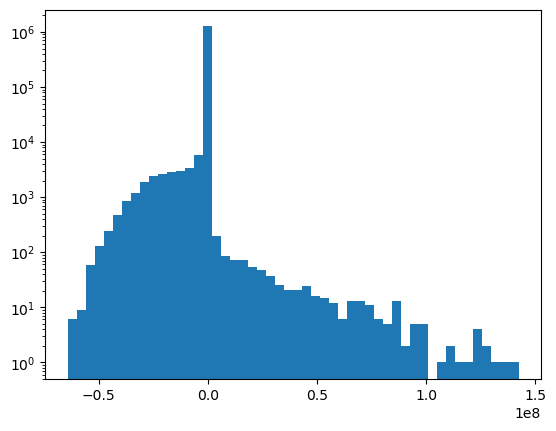

In [12]:
plt.hist(dst.flatten(), 50, log=True);